# Assignment 2: Trainable Parms and NN Regression (DL)
**Dr. Dave Wanik - University of Connecticut**

-----------------------------------------------
* Student Full Name: SHARATH REDDY MUTHYALA
* Student ID (7 digit number): 3134923


Let's cover some theory and application of neural networks for regression! In Q1 you will count trainable parameters. In Q2 you will read in real-world data and build, fit and evaluate a model!

Students may work with their fellow classmates to complete the assignment, but each student must do their own work (i.e. write their own math and submit their own assignment for grading.) If I find that notebooks look like direct copying (i.e. copying comments and code snippets), the students involved get a 0 on the assignment. **Do your own work!**

# (50 points) **Q1.** Recreate the math in the `model.summmary()` below

First, let's make sure you understand the concept of weights and biases.

Imagine that your data set has 20,000 rows and 50 columns. You are to count the trainable parameters and show the output shape for each layer in the network (update `ABCDEFG` below using your own StudentID).

**Note: if you have a 0 in your student ID, please recode it to a $5$ so that the math works out!**




_______________________________________________________
## Rubric
Recreate the model summary above using the outputs from your own 7 digit student ID.

To get full credit, no mathematical errors, correct number of weights and biases and specified, all LaTex equations are correct; bullets for each calculation are accurate and detailed enough to demonstrate mastery of the material.

In [1]:
from keras import models
from keras import layers

In [2]:
# leave this as 50 for now
n_features = 50

# put your 7 digit Student ID, replace the 3134923
# if you have a 0 in your studentID, please replace it with a 5 (so the math works out!)
A = 3
B = 1
C = 3
D = 4
E = 9
F = 2
G = 3

In [3]:
# now run this code
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(A, activation='relu', input_shape=(n_features,))) # see how we didnt hard code a 50 here?
model.add(Dense(B, activation='relu'))
model.add(Dense(C, activation='relu'))
model.add(Dense(D, activation='relu'))
model.add(Dense(E, activation='relu'))
model.add(Dense(F, activation='relu'))
model.add(Dense(G, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 153       
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 9)                 45        
                                                                 
 dense_5 (Dense)             (None, 2)                 20        
                                                                 
 dense_6 (Dense)             (None, 3)                 9

# Neural Network Structure and Parameters

## Input Layer:
- **Input Features**: 50

## Hidden Layer 1:
- **Input Connections**: 50
- **Neurons**: 3
- **Trainable Parameters**: $50 * 3 + 3 = 153$

## Hidden Layer 2:
- **Input Connections**: 3
- **Neurons**: 1
- **Trainable Parameters**: $3 * 1 + 1 = 4$

## Hidden Layer 3:
- **Input Connections**: 1
- **Neurons**: 1
- **Trainable Parameters**: $1 * 1 + 1 = 2$

## Hidden Layer 4:
- **Input Connections**: 1
- **Neurons**: 7
- **Trainable Parameters**: $1 * 7 + 7 = 14$

## Hidden Layer 5:
- **Input Connections**: 7
- **Neurons**: 7
- **Trainable Parameters**: $7 * 7 + 7 = 56$

## Hidden Layer 6:
- **Input Connections**: 7
- **Neurons**: 5
- **Trainable Parameters**: $7 * 5 + 5 = 40$

## Hidden Layer 7:
- **Input Connections**: 5
- **Neurons**: 2
- **Trainable Parameters**: $5 * 2 + 2 = 12$

## Output Layer:
- **Input Connections**: 2
- **Neurons**: 1
- **Trainable Parameters**: $2 * 1 + 1 = 3$

# Total Trainable Parameters:
The overall trainable parameters of the network are $153 + 4 + 2 + 14 + 56 + 40 + 12 + 3 = 284$.


# (50 points) **Q2.** Fit and evaluate a model using real-world data
I gave you (mostly) clean data to work with 😃
These are hourly observations of weather vs. energy (electricity) consumption in New England. This is a real-world dataset you can brag about on your resume when you apply to jobs.


## Rubric
Make sure you use lots of subheaders, comments and text narrative cells so that it's easy to grade - otherwise, points off!

**Prep the data (10 points):**
* Read the energy/weather data: https://drive.google.com/file/d/1ylQJKeCyMStvvMzRGDo8nR1TI8_3xGgP/view?usp=sharing
* Select columns for modeling
  * Check for missing values and inspect data types
  * The target variable is last column df['MWh']
  * You can use as many columns for X, but you may want to just stick to df['tmpf'] through `df['sknt']` along with the df['HE'] (which is the hour of the day).
    * A data dictionary for the weather data can be found at the bottom of this website: https://mesonet.agron.iastate.edu/request/download.phtml
  * If you want to be an overachiever (and I think you should!), feel free to do some feature engineering (but this is optional)
.
* Use an 80/20 train/val split
* Apply min/max or standard scalar to X_train and apply to X_test


**Build, compile and fit a model (20 points)**
* Use as many or as few layers as you would like, with as many or as few hidden units as you would like.
* You must use  dropout and early stopping (make sure you return the best weights, you can choose what value of patience to use.)
  * Here are some hints and a nice example of using dropout - values between 0.2 and 0.5 work well. https://machinelearningknowledge.ai/keras-dropout-layer-explained-for-beginners/

**Evaluate the model (20 points):**
* Make a learning curve for train and validation loss
* Create a scatterplot of actual vs. predicted for each partition
* Calculate MAE, RMSE and R2 for each partition.
* Write five bullets about how your experience went - for example: Did you try many different architectures or did you just get lucky on your first try?  Were you nervous or excited to build your first model on real-world data. How did you ensure your model didn't overfit or underfit? Any weird patterns in the scatterplot or error metrics? Be thoughtful here.

In [4]:
# have fun! Use lots of subheaders and comments and make something that you are proud of

# Importing the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Loading data and looking at the columns in the data

In [6]:
df = pd.read_csv('cleanweather_energy.csv')
df.head()

,valid,station,valid.1,lon,lat,tmpf,dwpf,relh,drct,sknt,...,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,H,Date,HE,MWh
0,2020-08-25 00:00:00,BDL,2020-08-25 00:55:00,-72.6825,41.9381,73.9,69.1,84.97,240.0,3.0,...,M,M,M,M,KBDL 250055Z AUTO 24002KT 10SM CLR 23/21 A2990...,M,D,2020-08-25 00:00:00,0,14986.78
1,2020-08-25 01:00:00,BDL,2020-08-25 01:55:00,-72.6825,41.9381,73.9,70.0,87.63,260.0,4.0,...,M,M,M,M,KBDL 250155Z AUTO 21002KT 10SM CLR 23/21 A2988...,M,D,2020-08-25 01:00:00,1,14433.29
2,2020-08-25 02:00:00,BDL,2020-08-25 02:55:00,-72.6825,41.9381,72.0,70.0,93.43,230.0,5.0,...,M,M,M,M,KBDL 250255Z AUTO 19004KT 10SM CLR 23/21 A2987...,M,D,2020-08-25 02:00:00,2,14152.24
3,2020-08-25 03:00:00,BDL,2020-08-25 03:55:00,-72.6825,41.9381,73.0,70.0,90.32,230.0,5.0,...,M,M,M,M,KBDL 250355Z AUTO 23002KT 10SM CLR 22/21 A2987...,M,D,2020-08-25 03:00:00,3,13846.08
4,2020-08-25 04:00:00,BDL,2020-08-25 04:55:00,-72.6825,41.9381,72.0,70.0,93.43,190.0,5.0,...,M,M,M,M,KBDL 250455Z AUTO 00000KT 10SM CLR 22/21 A2987...,M,D,2020-08-25 04:00:00,4,13872.55


# Data Analysis

In [7]:
basic_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid              96 non-null     object 
 1   station            96 non-null     object 
 2   valid.1            96 non-null     object 
 3   lon                96 non-null     float64
 4   lat                96 non-null     float64
 5   tmpf               96 non-null     float64
 6   dwpf               96 non-null     float64
 7   relh               96 non-null     float64
 8   drct               96 non-null     float64
 9   sknt               96 non-null     float64
 10  p01i               96 non-null     float64
 11  alti               96 non-null     float64
 12  mslp               96 non-null     float64
 13  vsby               96 non-null     float64
 14  gust               22 non-null     float64
 15  skyc1              96 non-null     object 
 16  skyc2              96 non-nu

In [8]:
df.shape


(96, 37)

In [9]:
df.describe()

,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,HE,MWh
count,9.600000e+01,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,22.000000,96.000000,96.00000
mean,-7.268250e+01,4.193810e+01,69.483333,56.632292,67.607083,291.250000,8.739583,0.007924,29.813854,1009.153125,10.0,21.181818,11.500000,14443.88250
std,9.999817e-14,5.714181e-14,8.234493,8.813691,21.687167,64.109282,5.284027,0.050614,0.074103,2.546988,0.0,5.687383,6.958524,2507.91228
min,-7.268250e+01,4.193810e+01,57.000000,37.900000,26.080000,80.000000,2.000000,0.000000,29.660000,1003.500000,10.0,15.000000,0.000000,10857.18000
25%,-7.268250e+01,4.193810e+01,62.100000,48.675000,49.732500,237.500000,5.000000,0.000000,29.747500,1007.075000,10.0,18.000000,5.750000,12850.06750
50%,-7.268250e+01,4.193810e+01,68.550000,59.000000,66.275000,320.000000,7.000000,0.000000,29.820000,1009.400000,10.0,19.500000,11.500000,13903.91500
75%,-7.268250e+01,4.193810e+01,75.000000,62.700000,90.400000,340.000000,11.250000,0.000000,29.870000,1011.225000,10.0,23.750000,17.250000,15319.71000
max,-7.268250e+01,4.193810e+01,90.000000,70.000000,100.000000,360.000000,30.000000,0.470000,29.940000,1013.400000,10.0,42.000000,23.000000,21359.46000


In [10]:
df.isnull().sum()

valid                 0
station               0
valid.1               0
lon                   0
lat                   0
tmpf                  0
dwpf                  0
relh                  0
drct                  0
sknt                  0
p01i                  0
alti                  0
mslp                  0
vsby                  0
gust                 74
skyc1                 0
skyc2                 0
skyc3                 0
skyc4                 0
skyl1                 0
skyl2                 0
skyl3                 0
skyl4                 0
wxcodes               0
ice_accretion_1hr     0
ice_accretion_3hr     0
ice_accretion_6hr     0
peak_wind_gust        0
peak_wind_drct        0
peak_wind_time        0
feel                  0
metar                 0
snowdepth             0
H                     0
Date                  0
HE                    0
MWh                   0
dtype: int64

The 'gust' column has 74 missing values, indicating that wind gust data is largely unavailable in this dataset.

In [11]:
unique_values = {}
selected_columns = ['station', 'skyc1', 'skyc2', 'skyc3', 'skyc4']
for col in selected_columns:
    unique_values[col] = df[col].unique()

unique_values

{'station': array(['BDL'], dtype=object),
 'skyc1': array(['FEW', 'SCT', 'CLR', 'M', 'OVC', 'VV '], dtype=object),
 'skyc2': array(['M', 'SCT', 'OVC'], dtype=object),
 'skyc3': array(['M', 'SCT', 'OVC'], dtype=object),
 'skyc4': array(['M', 'SCT', 'OVC'], dtype=object)}

/var/folders/hr/zyzv5c1x23g9v0y01h7q7zv00000gn/T/ipykernel_1993/3155711591.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.correlation = df.corr()
/var/folders/hr/zyzv5c1x23g9v0y01h7q7zv00000gn/T/ipykernel_1993/3155711591.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.correlation = df.corr()
/var/folders/hr/zyzv5c1x23g9v0y01h7q7zv00000gn/T/ipykernel_1993/3155711591.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<Axes: >

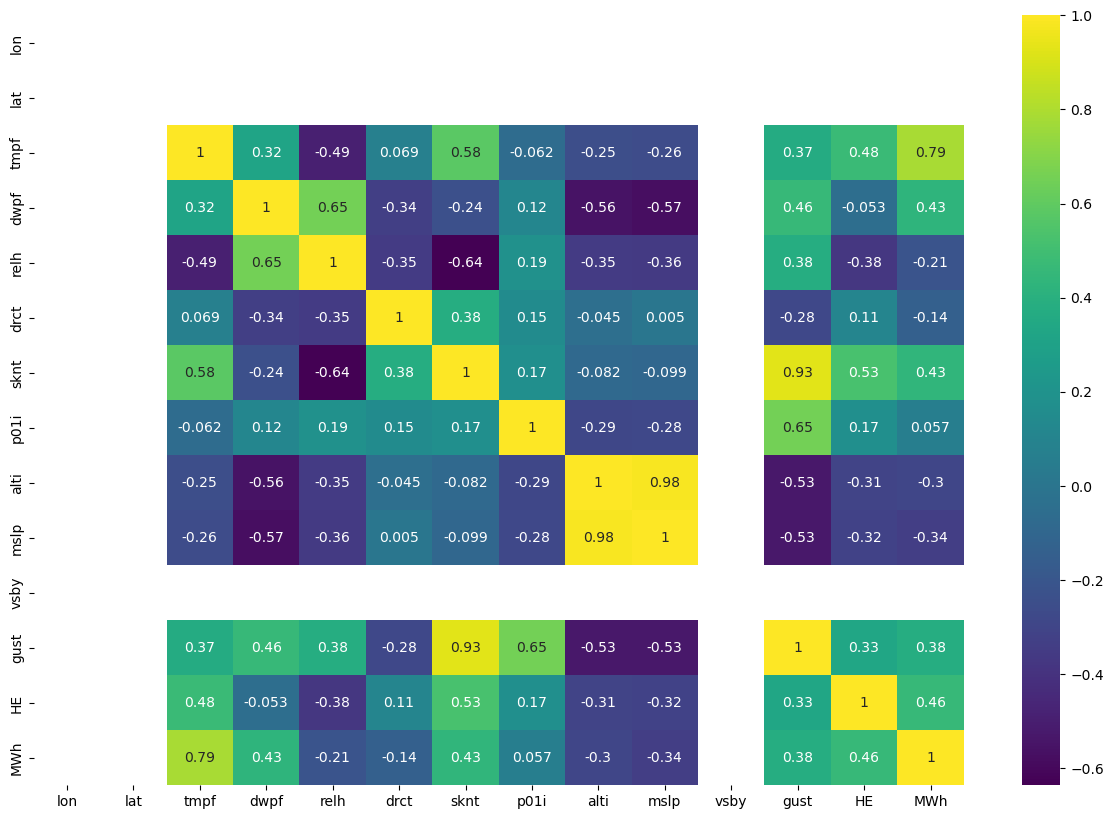

In [12]:
df.correlation = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

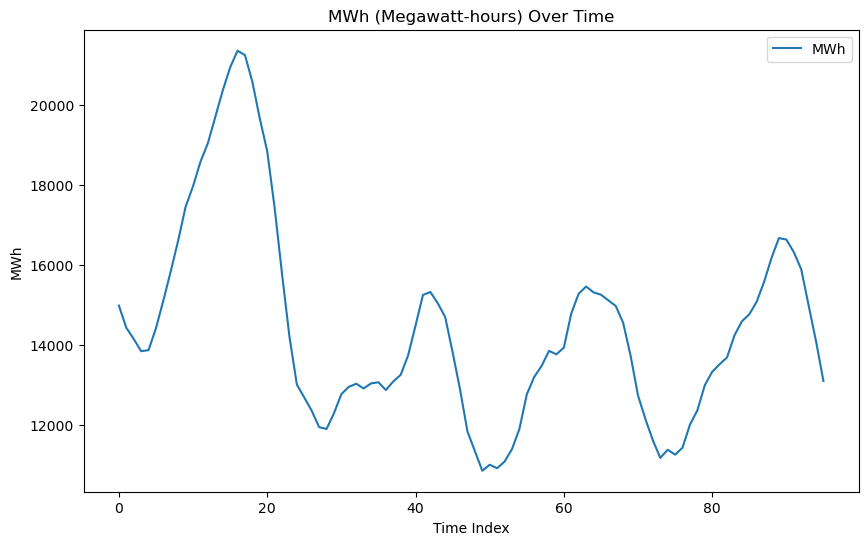

In [13]:
import matplotlib.pyplot as plt

# Plotting 'MWh' as the output variable
plt.figure(figsize=(10, 6))
plt.plot(df['MWh'], label='MWh')
plt.title('MWh (Megawatt-hours) Over Time')
plt.xlabel('Time Index')
plt.ylabel('MWh')
plt.legend()
plt.show()


In [14]:
# Selecting relevant columns
X = df.loc[:, 'tmpf':'sknt']
X['HE'] = df['HE']  # Adding the hour of the day
y = df['MWh']  # Target variable

# Checking for missing values and data types
missing_values_X = X.isnull().sum()
data_types_X = X.dtypes
missing_values_y = y.isnull().sum()
data_type_y = y.dtype

missing_values_X, data_types_X, missing_values_y, data_type_y


(tmpf    0
 dwpf    0
 relh    0
 drct    0
 sknt    0
 HE      0
 dtype: int64,
 tmpf    float64
 dwpf    float64
 relh    float64
 drct    float64
 sknt    float64
 HE        int64
 dtype: object,
 0,
 dtype('float64'))

Since there are no missing values in the selected features lets start building our model with these features.

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(76, 6)
(20, 6)
(76,)
(20,)


In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(12, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                84        
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 13        
                                                                 
Total params: 253 (1012.00 Byte)
Trainable params: 253 (1012.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=1000, callbacks=[early_stopping], shuffle = True, batch_size = 1)


Epoch 1/1000


76/76 [==============================] - 0s 1ms/step - loss: 215606576.0000 - mae: 14493.8047 - val_loss: 211942080.0000 - val_mae: 14252.9951
Epoch 2/1000
76/76 [==============================] - 0s 474us/step - loss: 215589280.0000 - mae: 14493.2002 - val_loss: 211925472.0000 - val_mae: 14252.3965
Epoch 3/1000
76/76 [==============================] - 0s 467us/step - loss: 215565952.0000 - mae: 14492.4209 - val_loss: 211902400.0000 - val_mae: 14251.5625
Epoch 4/1000
76/76 [==============================] - 0s 469us/step - loss: 215543728.0000 - mae: 14491.6611 - val_loss: 211872544.0000 - val_mae: 14250.4746
Epoch 5/1000
76/76 [==============================] - 0s 464us/step - loss: 215493520.0000 - mae: 14489.9033 - val_loss: 211823392.0000 - val_mae: 14248.7012
Epoch 6/1000
76/76 [==============================] - 0s 795us/step - loss: 215451968.0000 - mae: 14488.3984 - val_loss: 211747856.0000 - val_mae: 14245.9531
Epoch 7/1000
76/76 [==============================] - 0s 464us/step

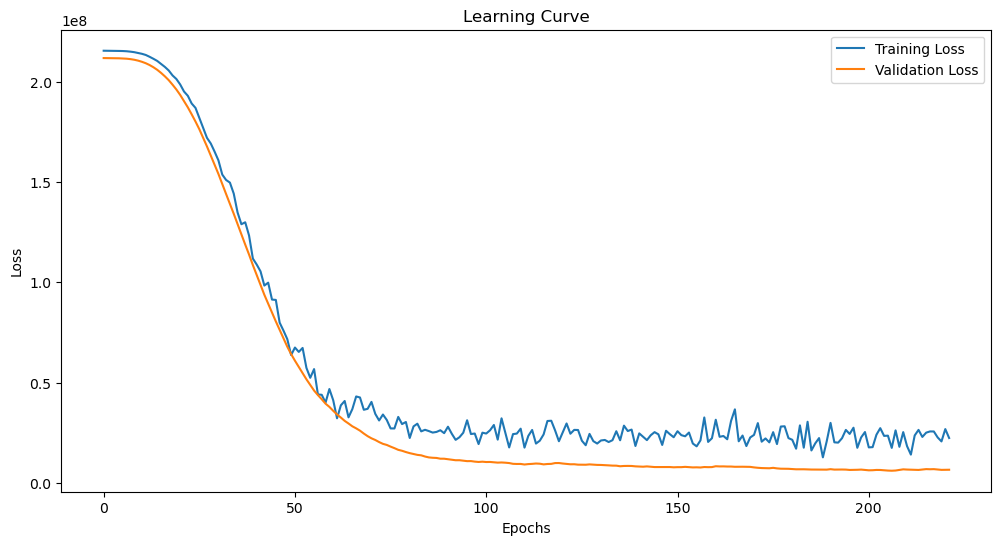

,loss,mae,val_loss,val_mae
0,215606576.0,14493.804688,211942080.0,14252.995117
1,215589280.0,14493.200195,211925472.0,14252.396484
2,215565952.0,14492.420898,211902400.0,14251.562500
3,215543728.0,14491.661133,211872544.0,14250.474609
4,215493520.0,14489.903320,211823392.0,14248.701172
...,...,...,...,...
217,25583334.0,4121.379883,6783028.0,1944.690430
218,22617618.0,3812.186768,6576176.5,1929.747681
219,20617358.0,3424.712891,6421296.0,1922.891357
220,26773696.0,4225.509277,6457571.0,1956.922119


In [21]:
# Plotting the learning curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Returning the history for further analysis
history_df = pd.DataFrame(history.history)
history_df


3/3 [==============================] - 0s 1ms/step


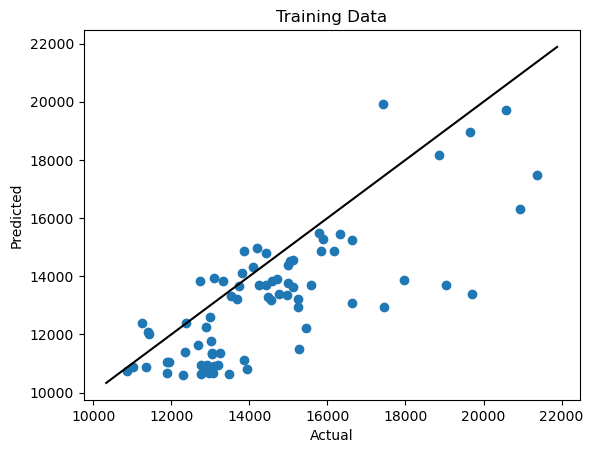

1/1 [==============================] - 0s 10ms/step


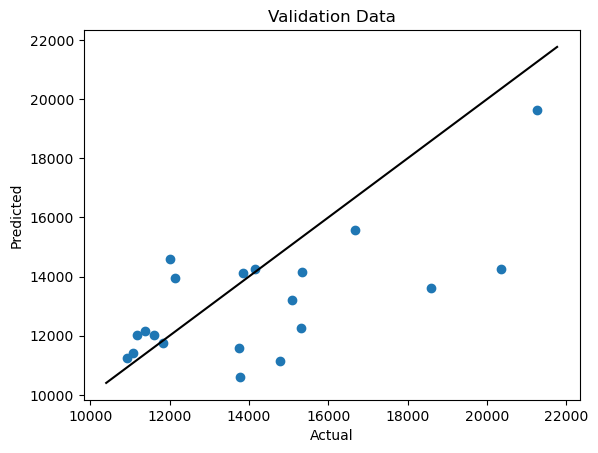

In [29]:
# Plot for Training Data
fig_train, ax_train = plt.subplots()
ax_train.scatter(y_train, model.predict(X_train))
ax_train.set_xlabel("Actual", fontsize=10)
ax_train.set_ylabel("Predicted", fontsize=10)
ax_train.set_title("Training Data")

# Draw a 45 degree line
line_x_train = np.linspace(*ax_train.get_xlim())
ax_train.plot(line_x_train, line_x_train, color='black')

# Show the training plot
plt.show()

# Plot for Validation Data
fig_test, ax_test = plt.subplots()
ax_test.scatter(y_test, model.predict(X_test))
ax_test.set_xlabel("Actual", fontsize=10)
ax_test.set_ylabel("Predicted", fontsize=10)
ax_test.set_title("Validation Data")

# Draw a 45 degree line
line_x_test = np.linspace(*ax_test.get_xlim())
ax_test.plot(line_x_test, line_x_test, color='black')

# Show the validation plot
plt.show()


In [23]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

print("For Training Data=>")
print("MAE :",mean_absolute_error(y_train,train_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred)))
print("R2-Score :",r2_score(y_train,train_pred))
print("=============================================================")
print("For Test Data=>")
print("MAE :",mean_absolute_error(y_test,test_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred)))
print("R2-Score :",r2_score(y_test,test_pred))


1/1 [==============================] - 0s 8ms/step
For Training Data=>
MAE : 1545.0594423314149
RMSE : 2013.4812789101568
R2-Score : 0.2676465477946025
For Test Data=>
MAE : 1821.061408203125
RMSE : 2448.286218326476
R2-Score : 0.31840020193442153
